In [1]:
### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [4]:
img=image.load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Training\Happy\images (7).jpeg")

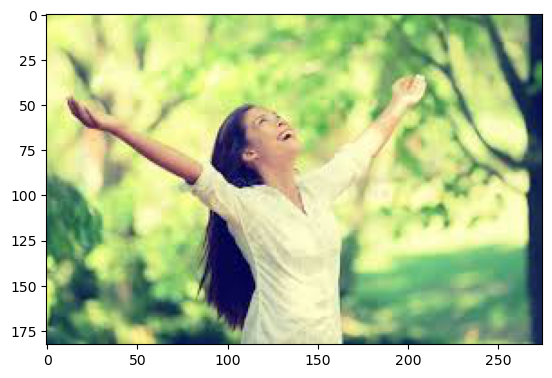

In [7]:
plt.imshow(img)

In [8]:
i1= cv2.imread(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Training\Happy\images (7).jpeg")
i1

array([[[115, 223, 205],
        [119, 227, 209],
        [125, 233, 215],
        ...,
        [ 87,  50,  30],
        [ 83,  50,  30],
        [ 82,  49,  29]],

       [[114, 222, 204],
        [118, 226, 208],
        [124, 232, 214],
        ...,
        [ 76,  39,  19],
        [ 72,  39,  19],
        [ 71,  38,  18]],

       [[117, 224, 208],
        [120, 227, 211],
        [126, 231, 216],
        ...,
        [ 71,  31,  12],
        [ 67,  32,  12],
        [ 67,  32,  12]],

       ...,

       [[ 79,  73,  32],
        [ 78,  75,  31],
        [ 82,  76,  33],
        ...,
        [ 83,  41,  22],
        [ 84,  40,  23],
        [ 83,  39,  22]],

       [[ 76,  64,  24],
        [ 75,  66,  23],
        [ 76,  67,  24],
        ...,
        [ 80,  40,  21],
        [ 83,  39,  22],
        [ 82,  38,  21]],

       [[ 77,  58,  20],
        [ 76,  60,  18],
        [ 77,  61,  19],
        ...,
        [ 80,  40,  21],
        [ 83,  39,  22],
        [ 82,  38,  21]]

In [9]:
i1.shape

(183, 275, 3)

In [10]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [11]:
train_dataset=train.flow_from_directory(r'C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Training\Happy\images (3).jpeg',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Validatiion\Happy\happy1.jpg',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\pc\\OneDrive\\Desktop\\Deep Learning\\CNN1\\Training\\Happy\\images (3).jpeg'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Create ImageDataGenerators (for normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load Training Data
train_dataset = train_datagen.flow_from_directory(
    r'C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Training',  # ✅ Folder path (not image)
    target_size=(200, 200),   # Resize all images to 200x200
    batch_size=3,
    class_mode='binary'       # Use 'categorical' if you have >2 classes
)

# Step 3: Load Validation Data
validation_dataset = validation_datagen.flow_from_directory(
    r'C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Validation',  # ✅ Folder path (not image)
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

# Step 4: Verify Loaded Classes
print("Classes found:", train_dataset.class_indices)



Found 18 images belonging to 2 classes.


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\pc\\OneDrive\\Desktop\\Deep Learning\\CNN1\\Validatiion\\Not happy\\sad1.jpg'

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    r'C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Training',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

validation_dataset = validation_datagen.flow_from_directory(
    r'C:\Users\pc\OneDrive\Desktop\Deep Learning\CNN1\Validatiion',  # ✅ ensure folder name matches exactly
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

print("Classes:", train_dataset.class_indices)


Found 18 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Classes: {'Happy': 0, 'Not Happy': 1}


In [21]:
 train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [22]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# 3️⃣ Compile the Model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [26]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset) 

Epoch 1/10


c:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.6667 - loss: 6.1069 - val_accuracy: 0.5000 - val_loss: 1.3029
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5556 - loss: 0.9530 - val_accuracy: 0.2500 - val_loss: 0.7381
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.7778 - loss: 0.5676 - val_accuracy: 0.2500 - val_loss: 1.0149
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8889 - loss: 0.9075 - val_accuracy: 0.5000 - val_loss: 0.8029
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.8889 - loss: 0.4314 - val_accuracy: 0.2500 - val_loss: 1.3046
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss: 0.1849 - val_accuracy: 0.5000 - val_loss: 1.9282
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7778 - loss: 1.0868 - val_accuracy: 0.5000 - val_loss: 0.8892
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 1.0000 - loss: 0.1787 - val_accuracy: 0.5000 - val_loss: 1.1961
Epo

In [27]:
history.history??

Object `history.history` not found.


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.5000 - val_loss: 1.8092
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8889 - loss: 0.2062 - val_accuracy: 0.5000 - val_loss: 2.4633
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.0768 - val_accuracy: 0.2500 - val_loss: 2.4707
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 0.0338 - val_accuracy: 0.5000 - val_loss: 2.8600
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.5000 - val_loss: 3.0136
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.5000 - val_loss: 3.2333
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 0.5000 - val_loss: 3.5606
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.2500 - val_loss:

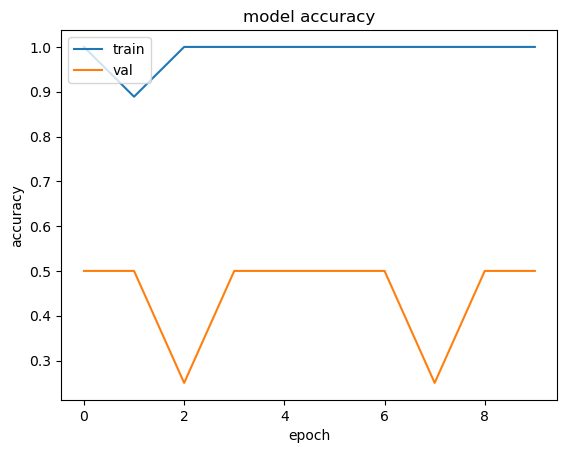

In [29]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

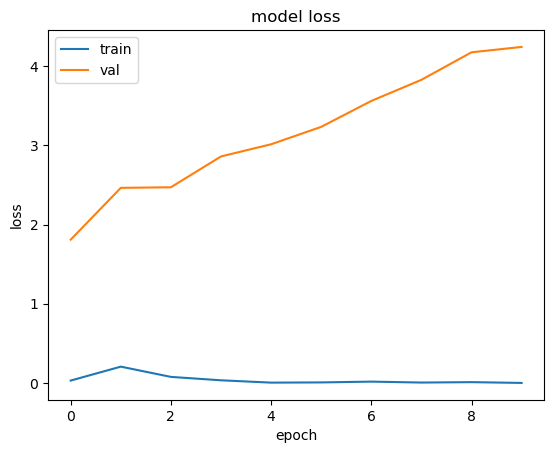

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()